**Part 1: Exploratory Data Analysis**

The attached logins.json file contains (simulated) timestamps of user logins in a particular geographic location. Aggregate these login counts based on 15minute time intervals, and visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand. Please report/illustrate important features of the demand, such as daily cycles. If there are data quality issues, please report them.

In [215]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20,10]
import warnings
warnings.filterwarnings("ignore")

In [216]:
# Read in the data
logins_df = pd.read_json('logins.json')
logins_df.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [217]:
logins_df.tail()

,login_time
93137,1970-04-13 18:50:19
93138,1970-04-13 18:43:56
93139,1970-04-13 18:54:02
93140,1970-04-13 18:57:38
93141,1970-04-13 18:54:23


In [218]:
# Initial check for data quality: Checking for null values. 
logins_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
login_time    93142 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


**Data Quality** $logins$

- The **logins** data looks good, there are no null values. The data contains informaton for 3 months  and 13 days from January 1970 to April 13th 1970. 
- Although its hard to believe that the logins were done in 1970 with no such technology available then, we will analyze the data as such and if required to analyze with trips data which is for Year 2014, we will change the dates. 

In [219]:
# second data file 
file = open('ultimate_data_challenge.json', 'r')

trips = pd.DataFrame(json.load(file))
file.close()

trips.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


In [220]:
trips.tail()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
49995,5.63,4.2,5.0,1.0,King's Landing,2014-06-05,iPhone,2014-01-25,0.0,0,False,100.0
49996,0.00,4.0,NaN,1.0,Astapor,2014-01-25,iPhone,2014-01-24,0.0,1,False,0.0
49997,3.86,5.0,5.0,1.0,Winterfell,2014-05-22,Android,2014-01-31,0.0,0,True,100.0
49998,4.58,3.5,3.0,1.0,Astapor,2014-01-15,iPhone,2014-01-14,0.0,2,False,100.0
49999,3.49,5.0,NaN,1.0,Astapor,2014-04-20,Android,2014-01-18,0.0,0,False,0.0


In [221]:
trips_sort = trips.sort_values(by=['signup_date'])

In [222]:
trips_sort.tail()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
2013,4.53,5.0,4.0,1.08,Astapor,2014-04-08,Android,2014-01-31,33.3,0,False,66.7
38728,7.90,5.0,4.5,1.00,Winterfell,2014-03-13,iPhone,2014-01-31,0.0,4,False,80.0
43123,1.98,4.6,5.0,1.18,King's Landing,2014-07-01,iPhone,2014-01-31,41.2,0,True,58.8
43127,1.90,4.9,5.0,1.01,King's Landing,2014-06-27,iPhone,2014-01-31,3.0,2,True,91.0
30220,3.50,5.0,5.0,1.00,Winterfell,2014-04-06,iPhone,2014-01-31,0.0,0,True,0.0


In [223]:
trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     49604 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


**Data Quality** $trips$
- The trips data is related to customers for one month, joining Ultimate in January 2014.
- The trips data has NULL values for the average rating columns and the phone column. The highest incidence of NULLs is in the trips data for the avg_rating_of_driver column. This column has 16% null values.

In [224]:
# Aggregate these login counts based on 15minute time intervals
logins_df.set_index('login_time', inplace=True)
logins_df['count'] = 1
login_15min_agg = logins_df.resample('15T').sum()

login_15min_agg.head()

,count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


In [225]:
login_15min_agg.index.min(), login_15min_agg.index.max()

(Timestamp('1970-01-01 20:00:00'), Timestamp('1970-04-13 18:45:00'))

In [226]:
login_15min_agg.index

DatetimeIndex(['1970-01-01 20:00:00', '1970-01-01 20:15:00',
               '1970-01-01 20:30:00', '1970-01-01 20:45:00',
               '1970-01-01 21:00:00', '1970-01-01 21:15:00',
               '1970-01-01 21:30:00', '1970-01-01 21:45:00',
               '1970-01-01 22:00:00', '1970-01-01 22:15:00',
               ...
               '1970-04-13 16:30:00', '1970-04-13 16:45:00',
               '1970-04-13 17:00:00', '1970-04-13 17:15:00',
               '1970-04-13 17:30:00', '1970-04-13 17:45:00',
               '1970-04-13 18:00:00', '1970-04-13 18:15:00',
               '1970-04-13 18:30:00', '1970-04-13 18:45:00'],
              dtype='datetime64[ns]', name='login_time', length=9788, freq='15T')

## Plotting the whole data Jan-April 1970

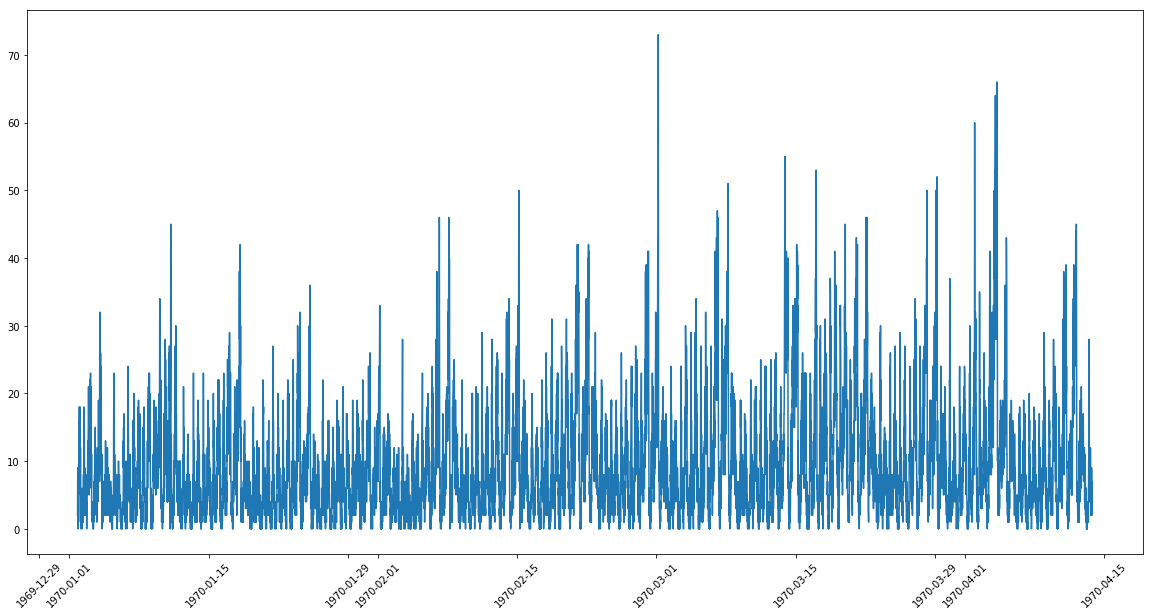

In [227]:
# Visualize the first 4 months in year 1970. 
plt.plot(login_15min_agg)
plt.xticks(rotation=45);

There seems to be a trend, but lets have a closer look at first four months and see if there is a definite pattern. There seems to be a break in the 4th month. Lets plot every month and see for any patterns.  

## Plot by Month

Define Function to Highlight Logins on Fridays, Saturdays, and Holidays:

In [228]:
def find_friSat_indices(datetime_array):
    indices = []
    for i in range(len(datetime_array)):
        if datetime_array[i].weekday() in [4,5]:
            indices.append(i)
    return indices

def highlight_friSat(indices, plt, df):
    i = 0
    while i < len(indices)-1:
        plt.axvspan(df.index[indices[i]], df.index[indices[i] + 1], facecolor='green', edgecolor='none', alpha=.5)
        i += 1

def find_holiday_indices(datetime_array):
    indices = []
    for i in range(len(datetime_array)):
        if datetime_array[i].strftime('%Y-%m-%d') in ['1970-01-01', '1970-01-19', '1970-02-02', '1970-02-16', '1970-03-17']:
            indices.append(i)
    return indices

def highlight_holidays(indices, plt, df):
    i = 0
    while i < len(indices)-1:
        plt.axvspan(df.index[indices[i]], df.index[indices[i] + 1], facecolor='red', edgecolor='none', alpha=.5)
        i += 1

(array([719163., 719167., 719171., 719175., 719179., 719183., 719187.,
        719191., 719194.]), <a list of 9 Text xticklabel objects>)

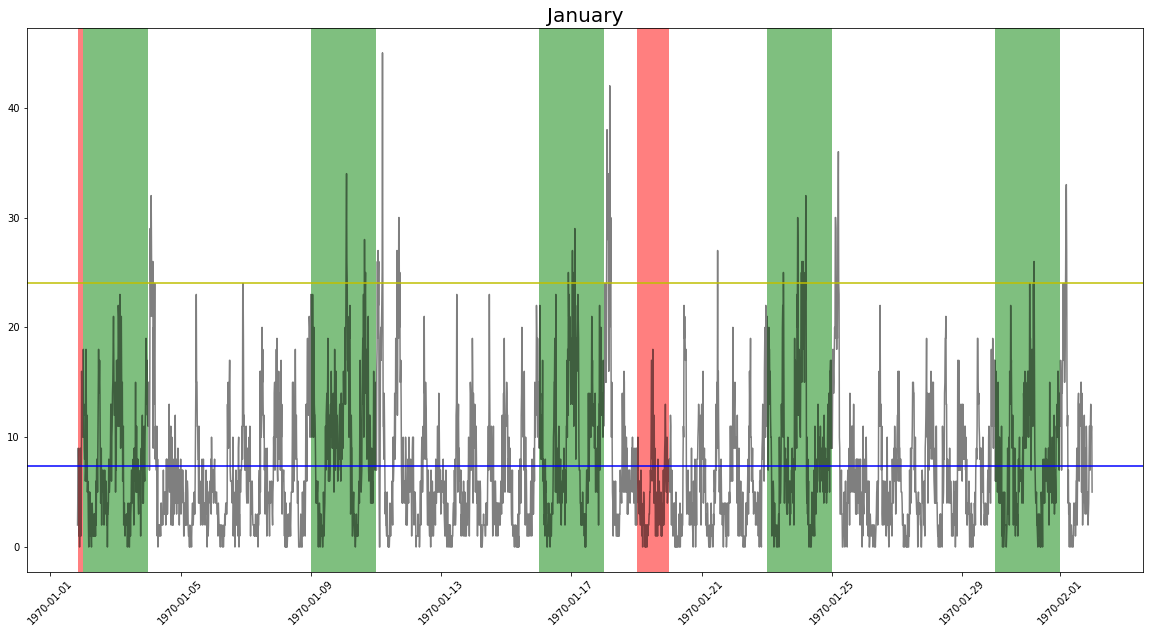

In [229]:
# Plot of the first month (january) of time series data
df_jan = login_15min_agg['1970-01-01': '1970-02-01']

friSat_indices = find_friSat_indices(df_jan.index)

holiday_indices = find_holiday_indices(df_jan.index)

plt.plot(df_jan, color='black', alpha=.5)
plt.axhline(y=df_jan['count'].mean(), color='b', linestyle='-')
plt.axhline(y=df_jan['count'].quantile(.98), color='y', linestyle='-')

highlight_friSat(friSat_indices, plt, df_jan)
highlight_holidays(holiday_indices, plt, df_jan)

plt.title('January', fontsize=20)
plt.xticks(rotation = 45)



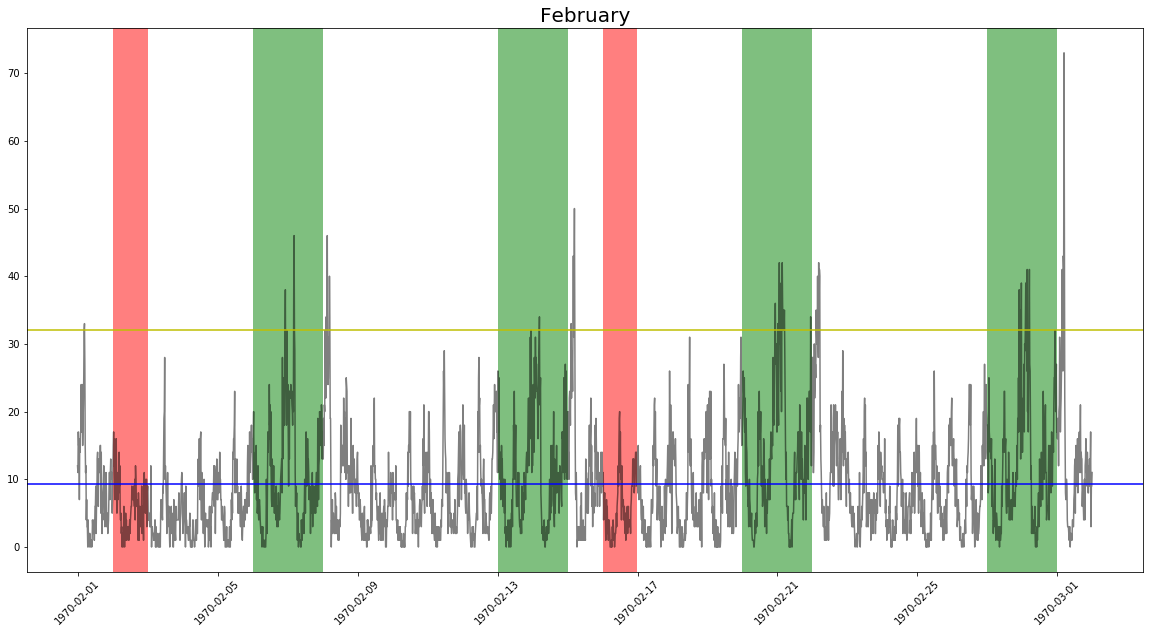

In [230]:
# Plot of the 2nd month (february) of time series data
df_feb = login_15min_agg['1970-02-01': '1970-03-01']

friSat_indices = find_friSat_indices(df_feb.index)

holiday_indices = find_holiday_indices(df_feb.index)

plt.plot(df_feb, color='black', alpha=.5)
plt.axhline(y=df_feb['count'].mean(), color='b', linestyle='-')
plt.axhline(y=df_feb['count'].quantile(.98), color='y', linestyle='-')

highlight_friSat(friSat_indices, plt, df_feb)
highlight_holidays(holiday_indices, plt, df_feb)

plt.title('February', fontsize=20)

plt.xticks(rotation=45);

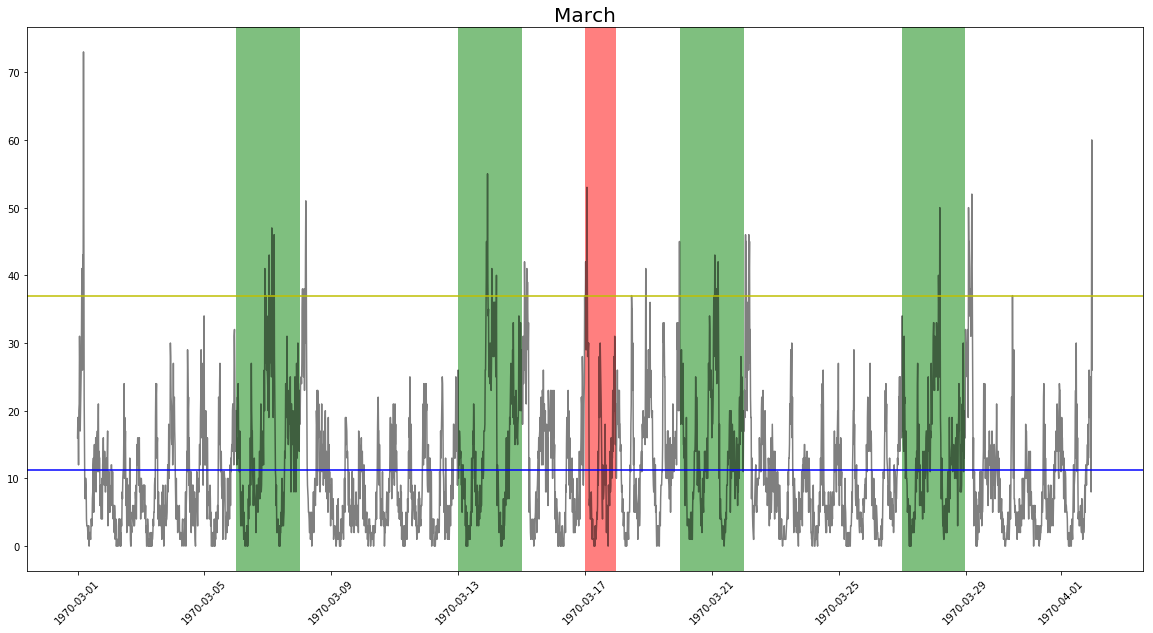

In [231]:
# Plot of march of the time series data
df_mar = login_15min_agg['1970-03-01': '1970-04-01']

friSat_indices = find_friSat_indices(df_mar.index)

holiday_indices = find_holiday_indices(df_mar.index)

plt.plot(df_mar, color='black', alpha=.5)
plt.axhline(y=df_mar['count'].mean(), color='b', linestyle='-')
plt.axhline(y=df_mar['count'].quantile(.98), color='y', linestyle='-')

highlight_friSat(friSat_indices, plt, df_mar)
highlight_holidays(holiday_indices, plt, df_mar)

plt.title('March', fontsize=20)

plt.xticks(rotation=45);

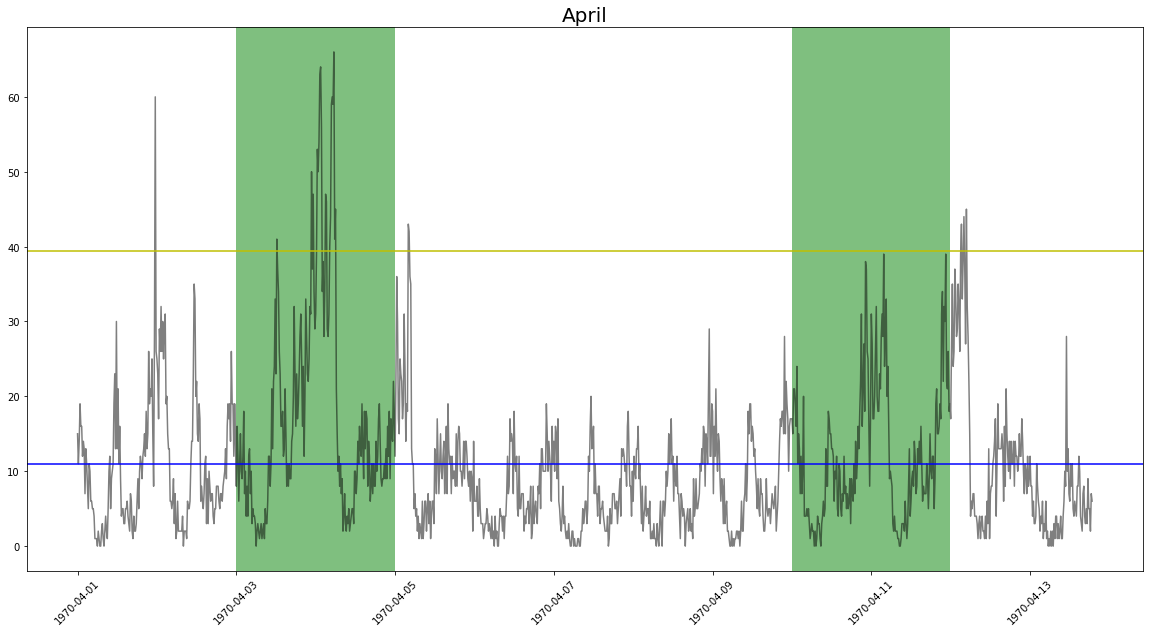

In [232]:
# Plot of the 4th month, (april) of time series data
df_april = login_15min_agg['1970-04-01': '1970-05-01']

friSat_indices = find_friSat_indices(df_april.index)

holiday_indices = find_holiday_indices(df_april.index)

plt.plot(df_april, color='black', alpha=.5)
plt.axhline(y=df_april['count'].mean(), color='b', linestyle='-')
plt.axhline(y=df_april['count'].quantile(.98), color='y', linestyle='-')

highlight_friSat(friSat_indices, plt, df_april)
highlight_holidays(holiday_indices, plt, df_april)

plt.title('April', fontsize=20)
plt.xticks(rotation=45);

**Observations**: 
- After looking at the first 4 months we see that there is definetly a pattern, however in the month of April there seems to be a break after 13/04. 
- Accross all months, ridership activity peaks most often on Friday and Saturdays.
- Every day shows two mini peaks which could be related to the busy times. 
- Ridership peaks for some but not all holidays.
- There are other days of the week when we see peaks. There may be some other explanation for these peak periods (sporting or cultural events, company promotions).


## **Plot by Week**  

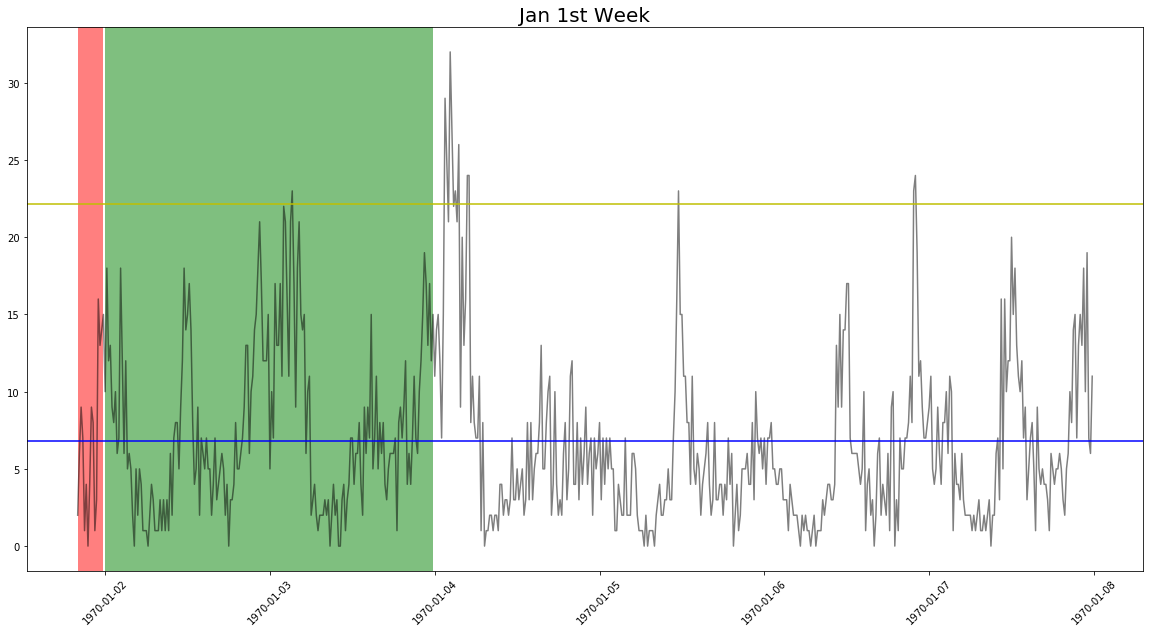

In [233]:
# Plot of the first month (january 1 week) of time series data
df_jan1 = login_15min_agg['1970-01-01': '1970-01-07']

friSat_indices = find_friSat_indices(df_jan1.index)

holiday_indices = find_holiday_indices(df_jan1.index)

plt.plot(df_jan1, color='black', alpha=.5)
plt.axhline(y=df_jan1['count'].mean(), color='b', linestyle='-')
plt.axhline(y=df_jan1['count'].quantile(.98), color='y', linestyle='-')

highlight_friSat(friSat_indices, plt, df_jan1)
highlight_holidays(holiday_indices, plt, df_jan1)

plt.title('Jan 1st Week', fontsize=20)
plt.xticks(rotation=45);



(0, 20)

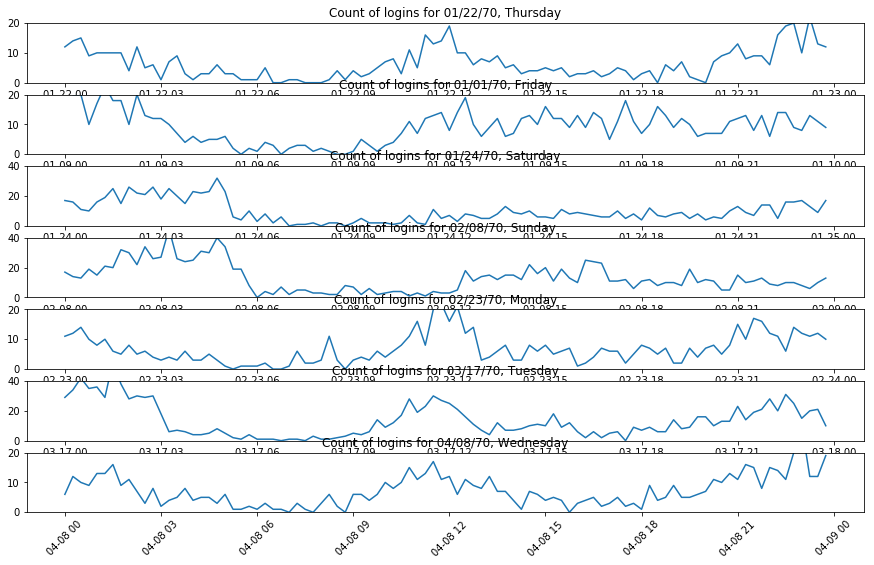

In [234]:
# let us look at the distibution of an arbitary 7 days, with 1 day for each day of the week
f,ax=plt.subplots(nrows=7, ncols=1, figsize=(15,9))
ax1,ax2,ax3,ax4,ax5,ax6,ax7= ax.flatten()
# for 01/01/70
ax1.set_title('Count of logins for 01/22/70, '+pd.to_datetime('1970-01-22').weekday_name)
ax1.plot(login_15min_agg['1970-01-22': '1970-01-22'])
plt.xticks(rotation=45);
ax1.set_ylim(0,20)

#for 01/09/70
ax2.set_title('Count of logins for 01/01/70, '+pd.to_datetime('1970-01-09').weekday_name)
ax2.plot(login_15min_agg['1970-01-09': '1970-01-09'])
plt.xticks(rotation=45);
ax2.set_ylim(0,20)

#for 01/24/70
ax3.set_title('Count of logins for 01/24/70, '+pd.to_datetime('1970-01-24').weekday_name)
ax3.plot(login_15min_agg['1970-01-24': '1970-01-24'])
plt.xticks(rotation=45);
ax3.set_ylim(0,40)

#for 02/08/70
ax4.set_title('Count of logins for 02/08/70, '+pd.to_datetime('1970-02-08').weekday_name)
ax4.plot(login_15min_agg['1970-02-08': '1970-02-08'])
plt.xticks(rotation=45);
ax4.set_ylim(0,40)

#for 02/23/70
ax5.set_title('Count of logins for 02/23/70, '+pd.to_datetime('1970-02-23').weekday_name)
ax5.plot(login_15min_agg['1970-02-23': '1970-02-23'])
plt.xticks(rotation=45);
ax5.set_ylim(0,20)

#for 03/17/70
ax6.set_title('Count of logins for 03/17/70, '+pd.to_datetime('1970-03-17').weekday_name)
ax6.plot(login_15min_agg['1970-03-17': '1970-03-17'])
plt.xticks(rotation=45);
ax6.set_ylim(0,40)

#for 04/08/70
ax7.set_title('Count of logins for 04/08/70, '+pd.to_datetime('1970-04-08').weekday_name)
ax7.plot(login_15min_agg['1970-04-08': '1970-04-08'])
plt.xticks(rotation=45);
ax7.set_ylim(0,20)


- We can see that there is an alternative peak pattern for weekends and weekdays. 
- During the weekends, we observe that the counts are high from 12-4am. 
- On weekdays we observe increase in counts between 9am to 1pm, then from 9pm to 12pm. Except for Monday where we observe the increase in counts in the morning and not in the night. 


# Part 2 - Experiment and Metrics Design

I would propose an A/B test using Bayes Theorem and MCMC simulation. 
- We can measure the proportion of rides spanning across both the cities before and after the change. 
- Then, we can create credible distributions of the proportion of rides spanning both cities for the pre and post change data sets. 
- If our post-change dataset shows an increase in the percentage of rides spanning both cities, based on some pre-defined criteria (e.g. the new average proportion is outside the 90%, or 95% credible interval of the prior distribution), then we can accept that the change in policy has encouraged an increase in cross-boundary rides.

## Part 3 - Predictive Modeling

In [237]:
#replace nulls
#ratings - impute average
avg = trips['avg_rating_by_driver'].mean()
trips['avg_rating_by_driver'].fillna(avg, inplace=True)

avg = trips['avg_rating_of_driver'].mean()
trips['avg_rating_of_driver'].fillna(avg, inplace=True)

#phone types - other
trips['phone'].fillna('Other', inplace = True)

In [238]:
trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      50000 non-null float64
avg_rating_of_driver      50000 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     50000 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [239]:
print('Datespan:\n', trips['signup_date'].min(), 'to', trips['signup_date'].max())
print('Most recent last trip dates:\n', sorted(trips['last_trip_date'].unique())[-10:])


Datespan:
 2014-01-01 to 2014-01-31
Most recent last trip dates:
 ['2014-06-22', '2014-06-23', '2014-06-24', '2014-06-25', '2014-06-26', '2014-06-27', '2014-06-28', '2014-06-29', '2014-06-30', '2014-07-01']


The most recent last trip date in our data set was July 1, 2014. As such, we will define our retained drivers as those that signed up in January 2014 and have been active within the most recent 30 day period, ending on July 1, 2014.

In [240]:
trips['retained'] = np.where(trips['last_trip_date'] >= '2014-06-01', 1, 0)

In [241]:
trips.drop(['last_trip_date', 'signup_date'], axis=1, inplace=True)

In [242]:
trips = pd.get_dummies(trips, columns = ['city', 'phone', 'ultimate_black_user'])

trips.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct,retained,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_Other,phone_iPhone,ultimate_black_user_False,ultimate_black_user_True
0,3.67,5.0,4.7,1.10,15.4,4,46.2,1,0,1,0,0,0,1,0,1
1,8.26,5.0,5.0,1.00,0.0,0,50.0,0,1,0,0,1,0,0,1,0
2,0.77,5.0,4.3,1.00,0.0,3,100.0,0,1,0,0,0,0,1,1,0
3,2.36,4.9,4.6,1.14,20.0,9,80.0,1,0,1,0,0,0,1,0,1
4,3.13,4.9,4.4,1.19,11.8,14,82.4,0,0,0,1,1,0,0,1,0


In [243]:
from sklearn.model_selection import train_test_split

target = trips['retained']
variables = trips
variables.drop('retained', axis = 1, inplace = True)

x_train, x_test, y_train, y_test = train_test_split(variables, target, test_size=0.25, random_state=0)


In [244]:
from sklearn.linear_model import LogisticRegression

#create object
logisticRegr = LogisticRegression()
logisticRegr.fit(x_train, y_train)


predictions = logisticRegr.predict(x_test)

In [245]:
score = logisticRegr.score(x_test, y_test)
print(score)

0.71912


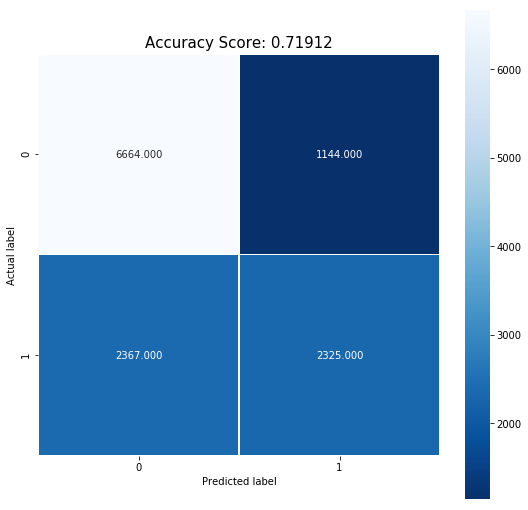

In [252]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn import metrics

cm = metrics.confusion_matrix(y_test, predictions)

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

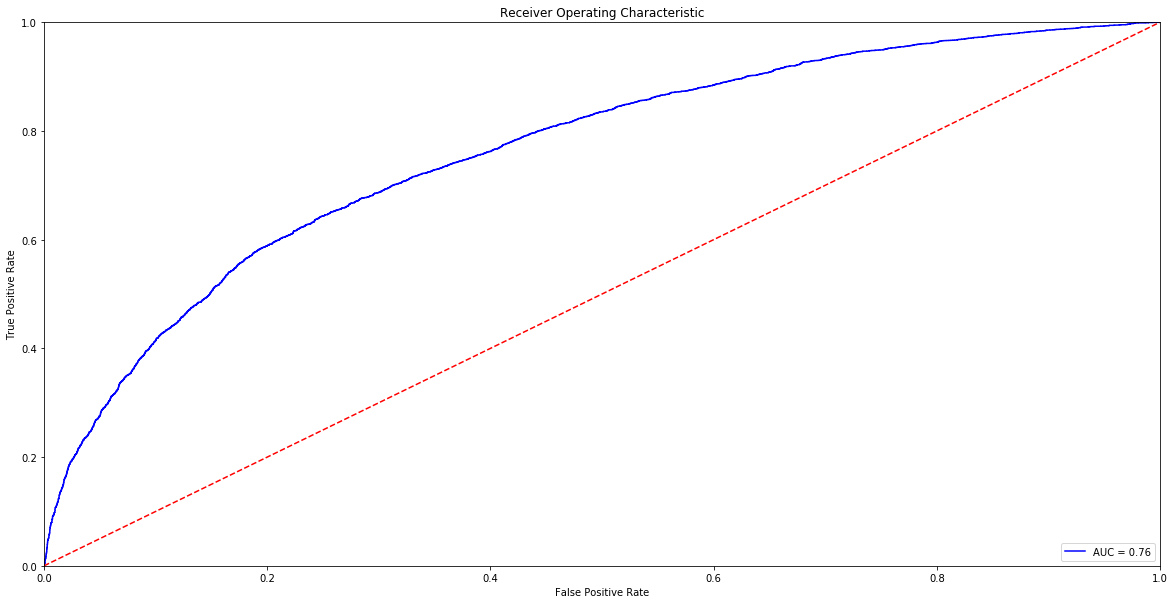

In [254]:
# calculate the fpr and tpr for all thresholds of the classification

probs = logisticRegr.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [255]:
fieldList = np.array(list(variables)).reshape(-1,1)

coeffs = np.reshape(np.round(logisticRegr.coef_,5),(-1,1))
coeffs=np.concatenate((fieldList,coeffs),axis=1)
coeffs = pd.DataFrame(coeffs,columns=['Field','Coeff'])
coeffs.sort_values(['Coeff'], ascending = False)

,Field,Coeff
8,city_King's Landing,1.04979
12,phone_iPhone,0.67502
14,ultimate_black_user_True,0.56837
5,trips_in_first_30_days,0.1182
11,phone_Other,0.03558
4,surge_pct,0.00389
7,city_Astapor,-0.65147
10,phone_Android,-0.43935
13,ultimate_black_user_False,-0.29711
3,avg_surge,-0.20276


Final Observations:

- My model performs relatively well, with a 71% accuracy and 0.75 AUC. 
- A potential next step would be to utilize non-linear model types like decision trees / random forests.
- A rider having an Android is associated with a -.43 decrease in the logodds of retention. This suggests that the Android app may not function as well as the Iphone app. Iphone usage is associated with a .67 increase in the log odds of retention.
- Users from King's Landing are more likely to be retained. Further investigation is needed to determine the reason. - If Ultimate conducts business differently in King's Landing (e.g. offers more promotions, etc.), it may be able to retain more customers by expanding these services to other neighborhoods.